In [30]:
import numpy as np              # Одномерные и многомерные массивы (array)
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import matplotlib.pyplot as plt # Научная графика
import seaborn as sns           # Еще больше красивой графики для визуализации данных

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [7]:
url = "https://raw.githubusercontent.com/SHVlader/ML/main/DB/star_classification.csv"
raw_data = pd.read_csv((url))

In [8]:
raw_data.shape

(100000, 18)

In [9]:
raw_data

obj_ID       alpha      delta         u         g         r  \
0      1.237661e+18  135.689107  32.494632  23.87882  22.27530  20.39501   
1      1.237665e+18  144.826101  31.274185  24.77759  22.83188  22.58444   
2      1.237661e+18  142.188790  35.582444  25.26307  22.66389  20.60976   
3      1.237663e+18  338.741038  -0.402828  22.13682  23.77656  21.61162   
4      1.237680e+18  345.282593  21.183866  19.43718  17.58028  16.49747   
...             ...         ...        ...       ...       ...       ...   
99995  1.237679e+18   39.620709  -2.594074  22.16759  22.97586  21.90404   
99996  1.237679e+18   29.493819  19.798874  22.69118  22.38628  20.45003   
99997  1.237668e+18  224.587407  15.700707  21.16916  19.26997  18.20428   
99998  1.237661e+18  212.268621  46.660365  25.35039  21.63757  19.91386   
99999  1.237661e+18  196.896053  49.464643  22.62171  21.79745  20.60115   

              i         z  run_ID  rerun_ID  cam_col  field_ID   spec_obj_ID  \
0      19.16573  18.79371    3606       301        2        79  6.543777e+18   
1      21.16812  21.61427    4518       301        5       119  1.176014e+19   
2      19.34857  18.94827    3606       301        2       120  5.152200e+18   
3      20.50454  19.25010    4192       301        3       214  1.030107e+19   
4      15.97711  15.54461    8102       301        3       137  6.891865e+18   
...         ...       ...     ...       ...      ...       ...           ...   
99995  21.30548  20.73569    7778       301        2       581  1.055431e+19   
99996  19.75759  19.41526    7917       301        1       289  8.586351e+18   
99997  17.69034  17.35221    5314       301        4       308  3.112008e+18   
99998  19.07254  18.62482    3650       301        4       131  7.601080e+18   
99999  20.00959  19.28075    3650       301        4        60  8.343152e+18   

        class  redshift  plate    MJD  fiber_ID  
0      GALAXY  0.634794   5812  56354       171  
1      GALAXY  0.779136  10445  58158       427  
2      GALAXY  0.644195   4576  55592       299  
3      GALAXY  0.932346   9149  58039       775  
4      GALAXY  0.116123   6121  56187       842  
...       ...       ...    ...    ...       ...  
99995  GALAXY  0.000000   9374  57749       438  
99996  GALAXY  0.404895   7626  56934       866  
99997  GALAXY  0.143366   2764  54535        74  
99998  GALAXY  0.455040   6751  56368       470  
99999  GALAXY  0.542944   7410  57104       851  

[100000 rows x 18 columns]

In [10]:
raw_data.head()

obj_ID       alpha      delta         u         g         r  \
0  1.237661e+18  135.689107  32.494632  23.87882  22.27530  20.39501   
1  1.237665e+18  144.826101  31.274185  24.77759  22.83188  22.58444   
2  1.237661e+18  142.188790  35.582444  25.26307  22.66389  20.60976   
3  1.237663e+18  338.741038  -0.402828  22.13682  23.77656  21.61162   
4  1.237680e+18  345.282593  21.183866  19.43718  17.58028  16.49747   

          i         z  run_ID  rerun_ID  cam_col  field_ID   spec_obj_ID  \
0  19.16573  18.79371    3606       301        2        79  6.543777e+18   
1  21.16812  21.61427    4518       301        5       119  1.176014e+19   
2  19.34857  18.94827    3606       301        2       120  5.152200e+18   
3  20.50454  19.25010    4192       301        3       214  1.030107e+19   
4  15.97711  15.54461    8102       301        3       137  6.891865e+18   

    class  redshift  plate    MJD  fiber_ID  
0  GALAXY  0.634794   5812  56354       171  
1  GALAXY  0.779136  10445  58158       427  
2  GALAXY  0.644195   4576  55592       299  
3  GALAXY  0.932346   9149  58039       775  
4  GALAXY  0.116123   6121  56187       842

In [11]:
raw_data.tail()

obj_ID       alpha      delta         u         g         r  \
99995  1.237679e+18   39.620709  -2.594074  22.16759  22.97586  21.90404   
99996  1.237679e+18   29.493819  19.798874  22.69118  22.38628  20.45003   
99997  1.237668e+18  224.587407  15.700707  21.16916  19.26997  18.20428   
99998  1.237661e+18  212.268621  46.660365  25.35039  21.63757  19.91386   
99999  1.237661e+18  196.896053  49.464643  22.62171  21.79745  20.60115   

              i         z  run_ID  rerun_ID  cam_col  field_ID   spec_obj_ID  \
99995  21.30548  20.73569    7778       301        2       581  1.055431e+19   
99996  19.75759  19.41526    7917       301        1       289  8.586351e+18   
99997  17.69034  17.35221    5314       301        4       308  3.112008e+18   
99998  19.07254  18.62482    3650       301        4       131  7.601080e+18   
99999  20.00959  19.28075    3650       301        4        60  8.343152e+18   

        class  redshift  plate    MJD  fiber_ID  
99995  GALAXY  0.000000   9374  57749       438  
99996  GALAXY  0.404895   7626  56934       866  
99997  GALAXY  0.143366   2764  54535        74  
99998  GALAXY  0.455040   6751  56368       470  
99999  GALAXY  0.542944   7410  57104       851

In [12]:
raw_data.sample(5)

obj_ID       alpha      delta         u         g         r  \
29677  1.237674e+18  118.930979  17.038232  24.63428  22.46455  21.54989   
2549   1.237658e+18  179.805935  54.284123  21.75627  21.38941  21.25745   
27545  1.237659e+18  241.689860  45.087162  23.98903  23.92146  21.61841   
64159  1.237657e+18  359.015367  -0.165903  21.71153  21.52943  21.75883   
44744  1.237679e+18    7.263188   5.168421  22.34334  21.80104  20.87916   

              i         z  run_ID  rerun_ID  cam_col  field_ID   spec_obj_ID  \
29677  20.21562  22.82696    6597       301        1       157  5.061160e+18   
2549   21.31185  21.10914    2821       301        2       182  7.530155e+18   
27545  20.60279  19.72357    3226       301        6        55  9.608552e+18   
64159  21.96773  22.51879    2728       301        3       406  1.031234e+19   
44744  19.95567  19.58787    7727       301        4       115  4.842722e+18   

        class  redshift  plate    MJD  fiber_ID  
29677  GALAXY  0.413959   4495  55566       871  
2549      QSO  2.073779   6688  56412       496  
27545  GALAXY  0.571698   8534  57905       445  
64159  GALAXY  0.026203   9159  57666       800  
44744  GALAXY  0.694316   4301  55810       823

In [14]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [15]:
raw_data.isnull().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

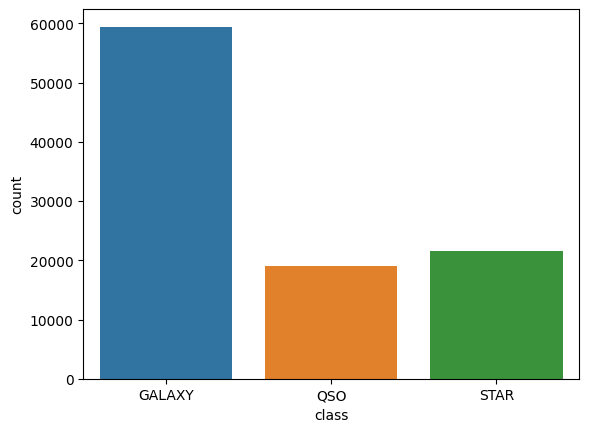

In [17]:
sns.countplot(x='class', data=raw_data)
pass

In [18]:
raw_data['class'].value_counts()

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64

In [19]:
numerical_list = ["obj_ID","alpha","delta","u","g","r","i","z","run_ID","rerun_ID","cam_col","field_ID","spec_obj_ID","class","redshift","plate","MJD","fiber_ID"]

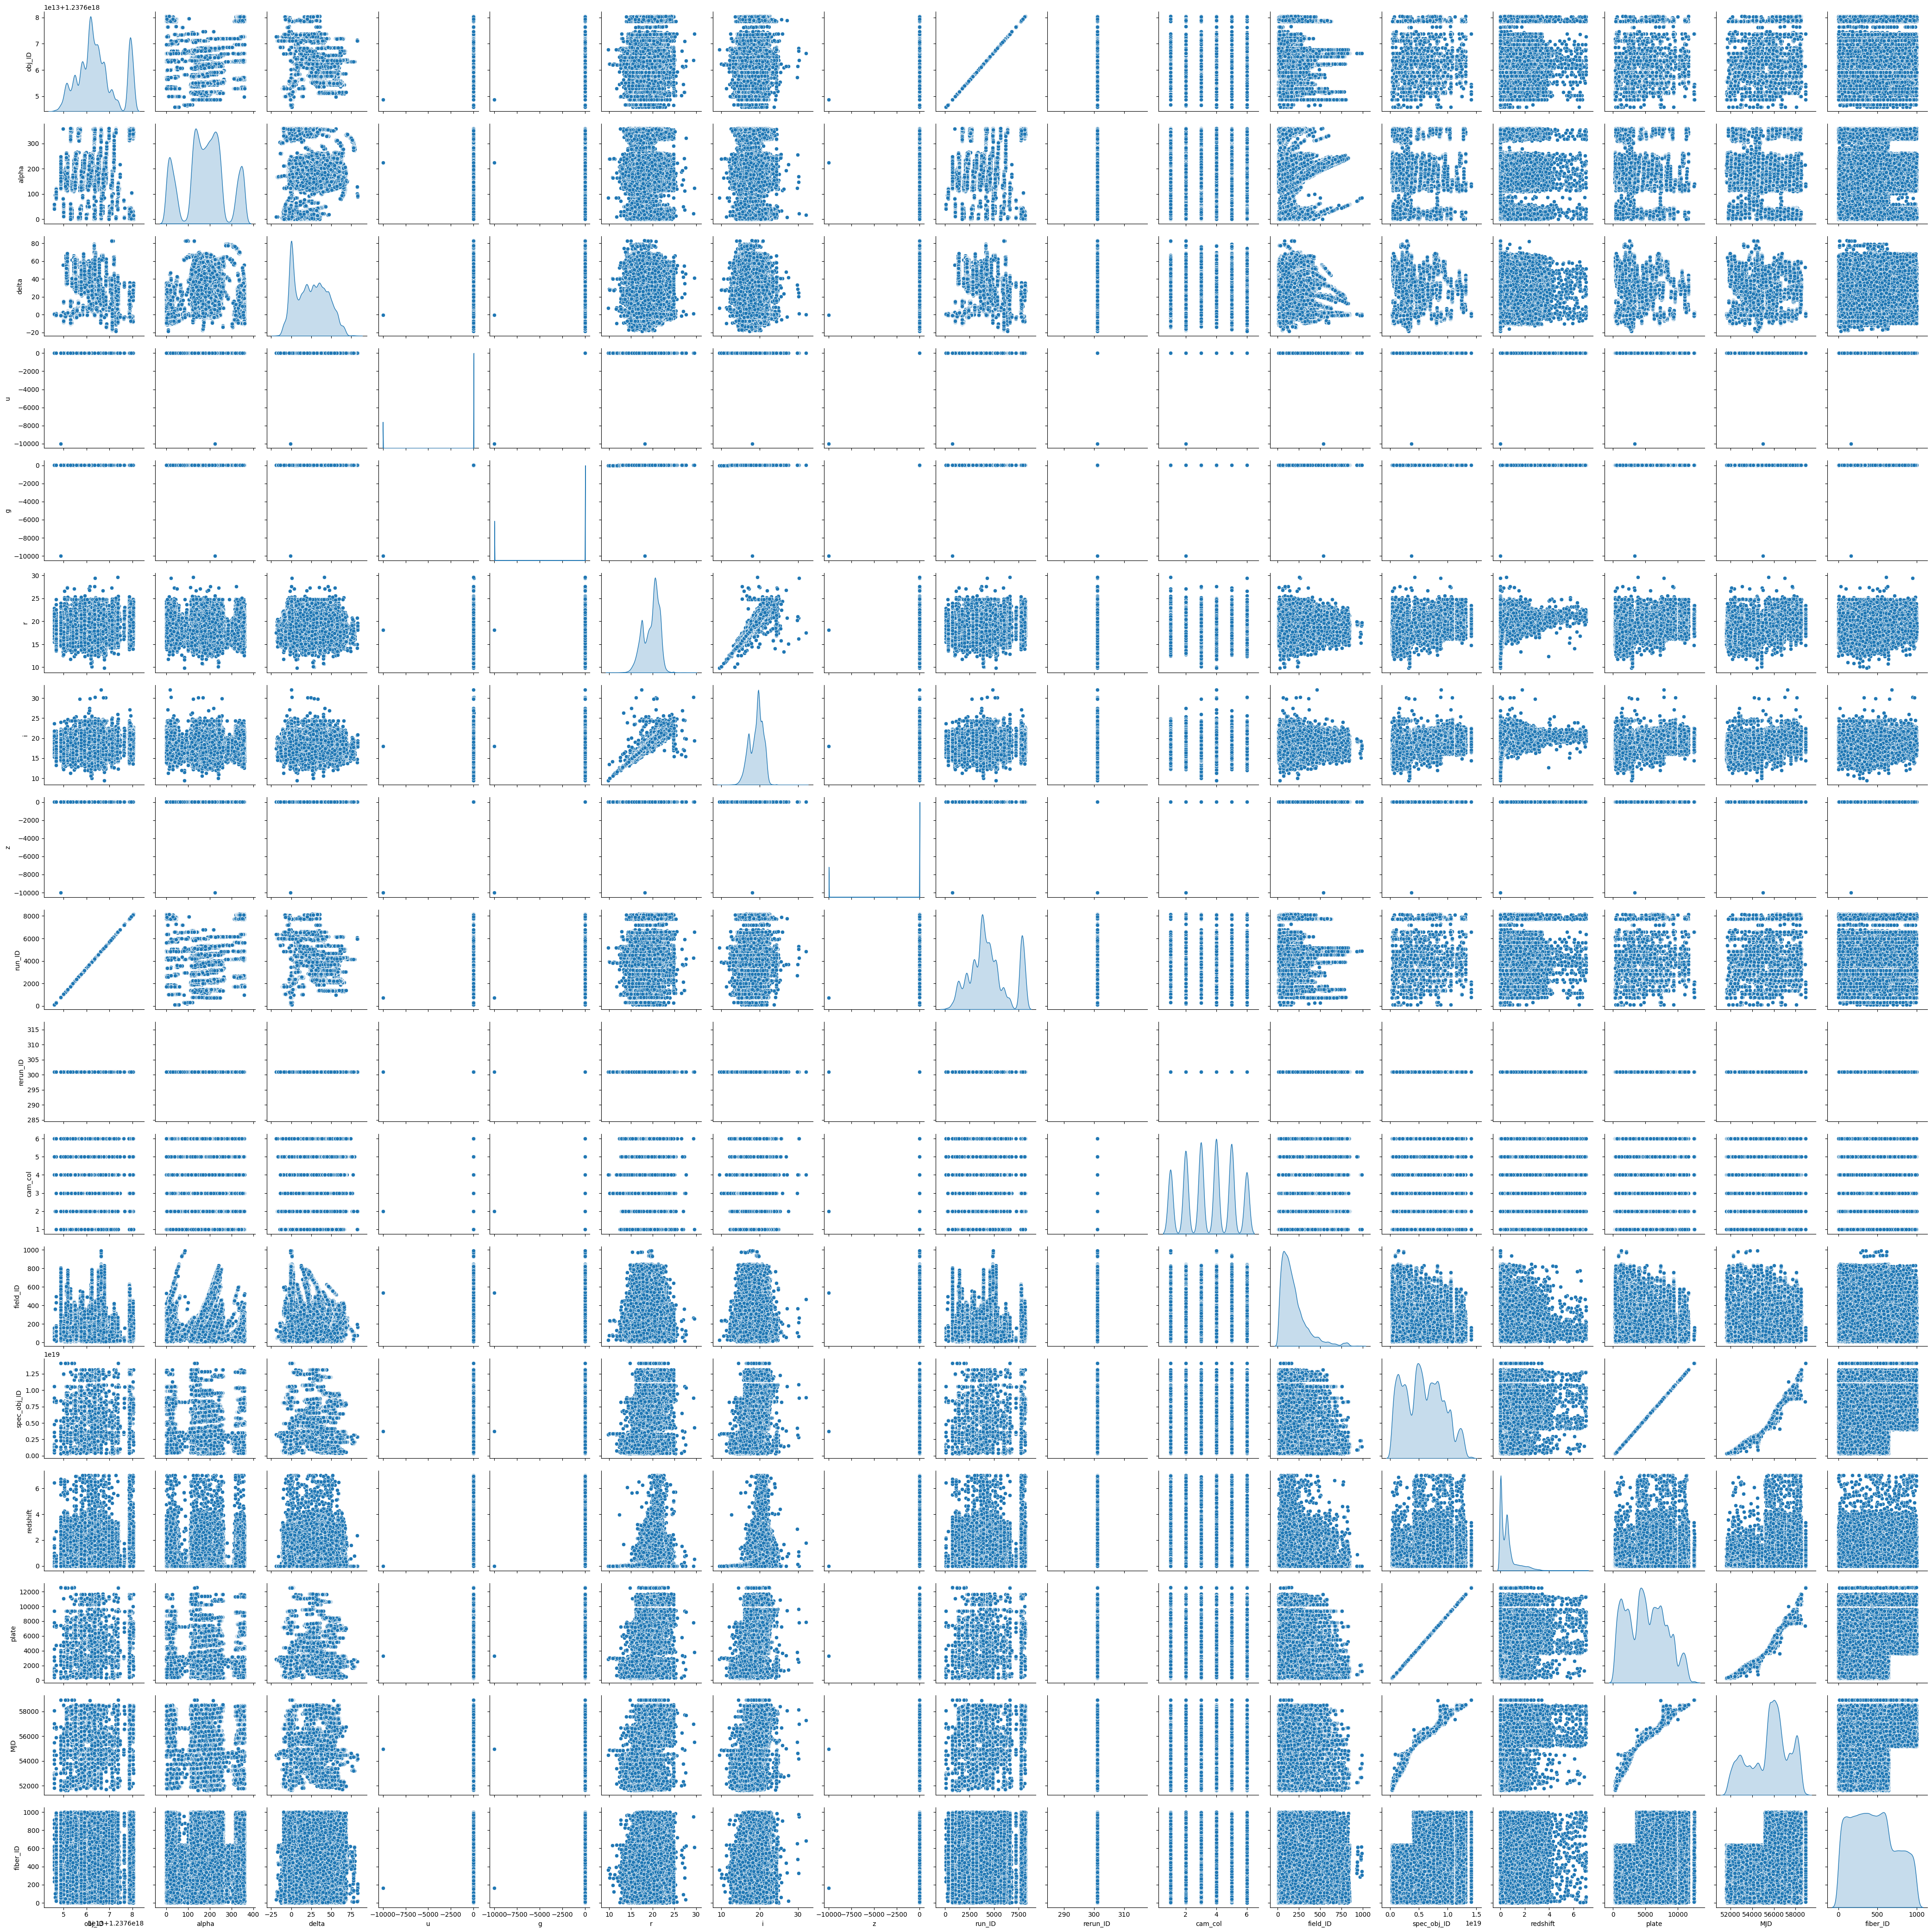

In [21]:
raw_data_numeric = raw_data.loc[:, numerical_list]
sns.pairplot(raw_data_numeric, diag_kind = 'kde')
plt.show()

c:\Users\shabu\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\plotting\_matplotlib\misc.py:101: UserWarning: Attempting to set identical left == right == 301.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
c:\Users\shabu\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\plotting\_matplotlib\misc.py:102: UserWarning: Attempting to set identical bottom == top == 301.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
c:\Users\shabu\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\plotting\_matplotlib\misc.py:92: UserWarning: Attempting to set identical left == right == 301.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


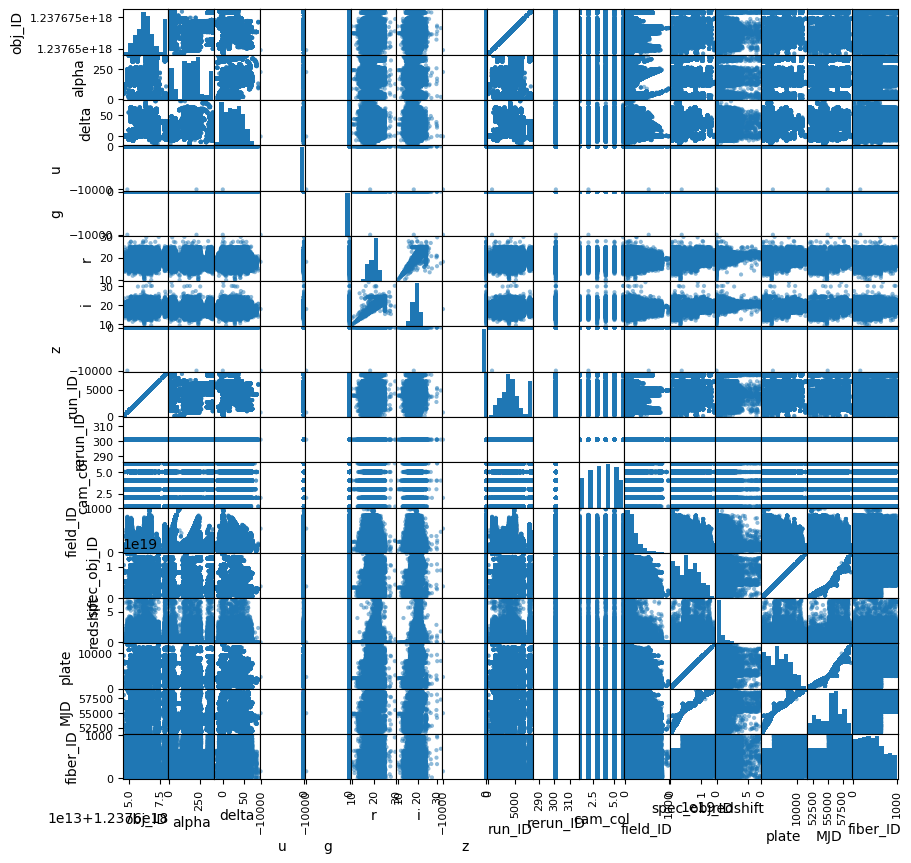

In [22]:
pd.plotting.scatter_matrix(raw_data,figsize=(10,10))
pass

TypeError: Horizontal orientation requires numeric `x` variable.

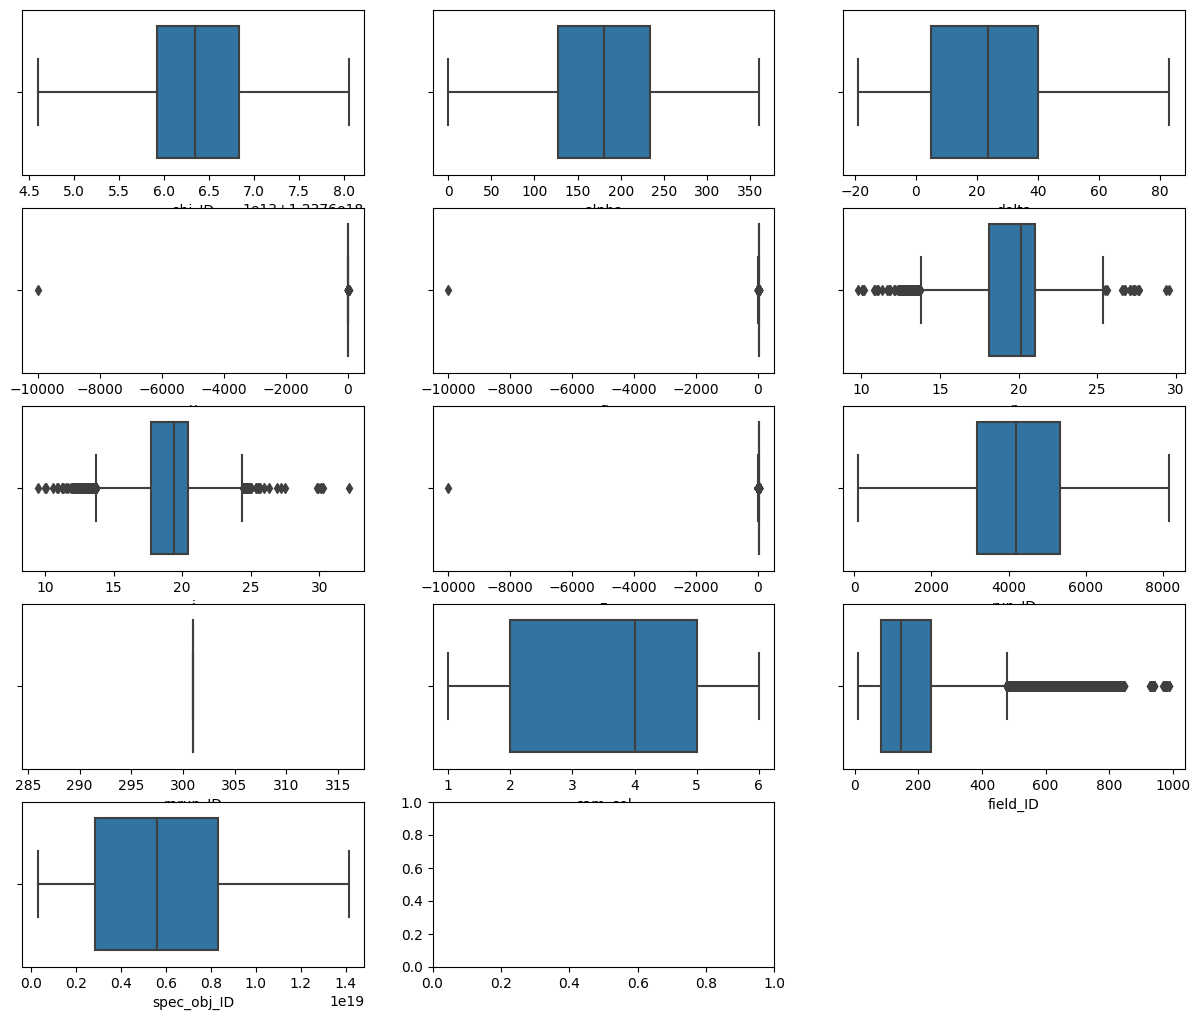

In [25]:
fig = plt.figure(figsize=(15, 15))

for i in range(len(raw_data.columns)):
    fig.add_subplot(6,3, i+1)
    sns.boxplot(x=raw_data[raw_data.columns[i]])
    
plt.show()

In [26]:
def outlier(data):
    for feature in data.columns:
        q1 = np.quantile(data[feature], .25)
        q3 = np.quantile(data[feature], .75)
        
        p1 = np.quantile(data[feature], .1)
        p9 = np.quantile(data[feature], .9)
        
        iqr = q3 - q1
        
        min_iqr = q1 - iqr*1.5
        max_iqr = q3 + iqr*1.5
        
        for row in data.index:
            if data.loc[row, feature] < min_iqr:
                 data.loc[row, feature] = p1
            elif  data.loc[row, feature] > max_iqr:
                 data.loc[row, feature] = p9

In [27]:
outlier(data=raw_data)

UFuncTypeError: ufunc 'subtract' did not contain a loop with signature matching types (dtype('<U6'), dtype('<U6')) -> None

TypeError: Horizontal orientation requires numeric `x` variable.

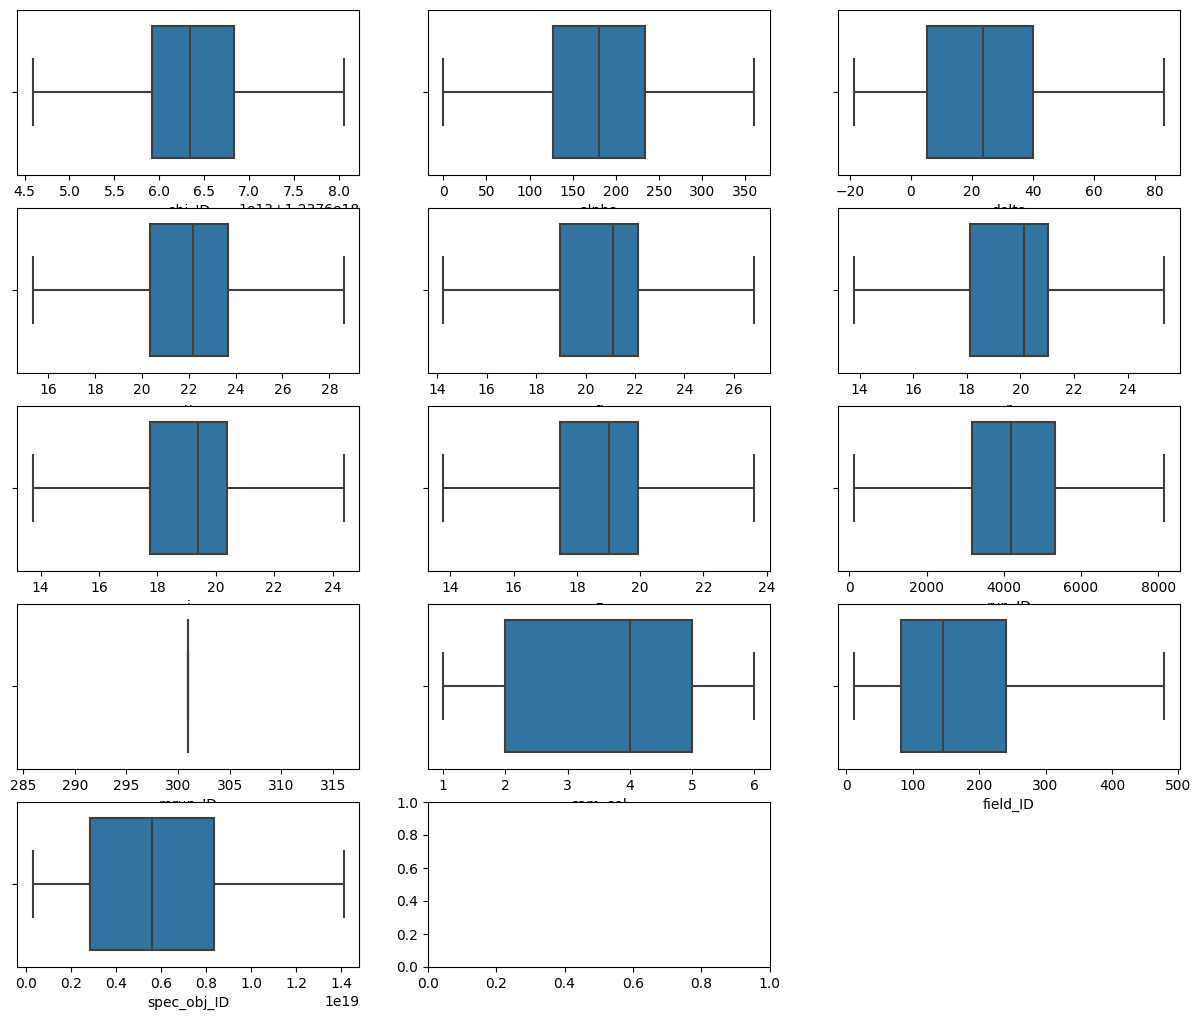

In [28]:
fig = plt.figure(figsize=(15, 15))

for i in range(len(raw_data.columns)):
    fig.add_subplot(6, 3, i+1)
    sns.boxplot(x=raw_data[raw_data.columns[i]])
    
plt.show()

In [31]:
X = raw_data.drop(columns=['class'])
y = raw_data.loc[:, ['class']]
minmax = MinMaxScaler()
scaled = minmax.fit_transform(X)

In [32]:
best_feature = SelectKBest(score_func=chi2)
fit = best_feature.fit(scaled, y)

In [33]:
feature_score = pd.DataFrame({
    'feature' : X.columns,
    'score': fit.scores_
})

In [34]:
feature_score.sort_values(by=['score'], ascending=False, inplace=True)
feature_score

feature        score
13     redshift  8105.454203
14        plate  1365.314507
12  spec_obj_ID  1365.283990
7             z  1060.386300
15          MJD   912.613448
6             i   762.287759
3             u   437.769600
5             r   421.282340
4             g   351.223865
16     fiber_ID   143.588657
2         delta    38.275793
8        run_ID    26.806298
0        obj_ID    26.803857
11     field_ID    22.567848
10      cam_col    10.809011
1         alpha     6.390544
9      rerun_ID          NaN

In [35]:
std = StandardScaler()
scaled = std.fit_transform(X)
scaled = pd.DataFrame(scaled, columns=X.columns)
scaled.head()

obj_ID     alpha     delta         u         g         r         i  \
0 -0.445634 -0.434604  0.425529  0.800250  0.810083  0.404933  0.044021   
1  0.018740 -0.339921  0.363402  1.200576  1.084756  1.594585  1.196202   
2 -0.445633 -0.367251  0.582713  1.416816  1.001853  0.521620  0.149227   
3 -0.147311  1.669523 -1.249105  0.024337  1.550959  1.065992  0.814376   
4  1.842768  1.737310 -0.150242 -1.178124 -1.506922 -1.712840 -1.790721   

          z    run_ID  rerun_ID   cam_col  field_ID  spec_obj_ID  redshift  \
0  0.010630 -0.445535       0.0 -0.952553 -0.829054     0.228609  0.079557   
1  1.631422  0.018646       0.0  0.937920 -0.474728     1.797912  0.277096   
2  0.099445 -0.445535       0.0 -0.952553 -0.465870    -0.190037  0.092423   
3  0.272887 -0.147278       0.0 -0.322395  0.366797     1.358962  0.486770   
4 -1.856417  1.842792       0.0 -0.322395 -0.315281     0.333328 -0.630267   

      plate       MJD  fiber_ID  
0  0.228633  0.423203 -1.021342  
1  1.797924  1.420729 -0.081883  
2 -0.190025  0.001854 -0.551612  
3  1.358942  1.354927  1.195196  
4  0.333297  0.330860  1.441070

In [36]:
data_standardization = y.join(scaled)

In [37]:
X = data_standardization.loc[:, ['redshift', 'plate', 'spec_obj_ID', 'z', 'MJD', 'i', 'u', 'r', 'g']]
y = data_standardization.loc[:, 'class']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [39]:
k_neighbors = 20
metrics = ['euclidean', 'manhattan']

In [40]:
accuracy_total = []
for k in range(1, k_neighbors+1, 1):
    accuracy_k = []
    for metric in metrics:
        knn = KNeighborsClassifier(n_neighbors=k, weights='distance', metric=metric)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_k.append(accuracy)
    accuracy_total.append(accuracy_k)

In [41]:
accuracy_df = pd.DataFrame(np.array(accuracy_total), columns=metrics)
k_df = pd.DataFrame([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], columns=['k'])
accuracy_join= k_df.join(accuracy_df)

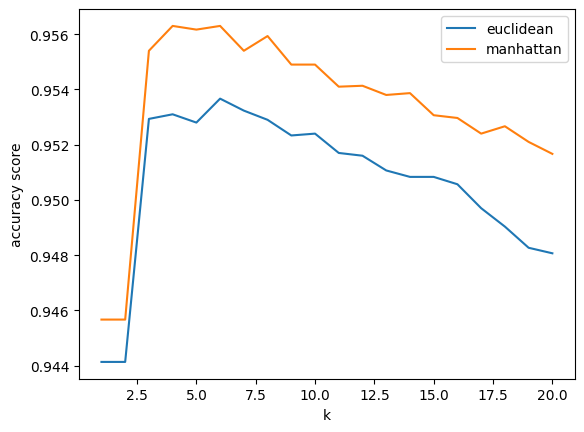

In [42]:
plt.plot(accuracy_join['k'], accuracy_join['euclidean'], label='euclidean')
plt.plot(accuracy_join['k'], accuracy_join['manhattan'], label='manhattan')

plt.legend()
plt.xlabel('k')
plt.ylabel('accuracy score')
plt.show()

In [43]:
knn = KNeighborsClassifier(n_neighbors=8, weights='distance', metric='manhattan')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=8, weights='distance')

In [44]:
y_pred = knn.predict(X_test)

In [45]:
accuracy_score(y_test, y_pred)

0.9559333333333333

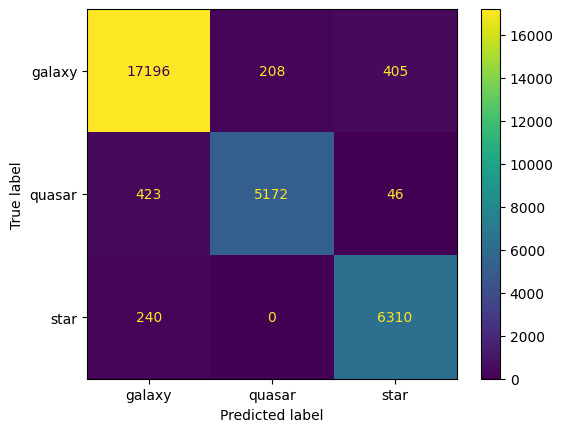

In [46]:
cm = confusion_matrix(y_test, y_pred)
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['galaxy', 'quasar', 'star'])
cm_disp.plot()

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      GALAXY       0.96      0.97      0.96     17809
         QSO       0.96      0.92      0.94      5641
        STAR       0.93      0.96      0.95      6550

    accuracy                           0.96     30000
   macro avg       0.95      0.95      0.95     30000
weighted avg       0.96      0.96      0.96     30000

